__HOMEWORK 9: SVM__
<br>
Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11291820
<br>
Class: DSEB 63

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Exercise 2
* __Dataset__

In [3]:
data = pd.read_csv("../data/dataset1.csv", index_col=0)
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


* __Visualize the dataset__

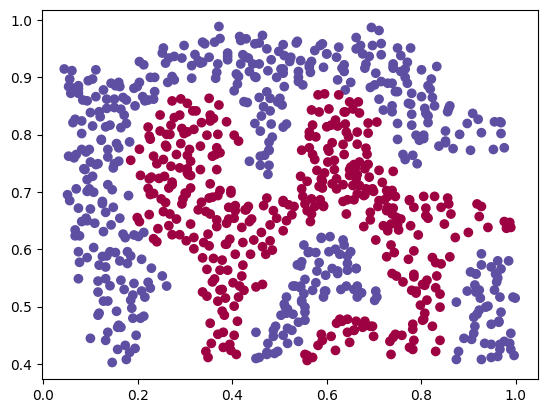

In [4]:
# define required elements
X1, X2, y = data["X1"], data["X2"], data["y"]

# create a new figure and axes
fig1, ax1 = plt.subplots()

# visualization
ax1.scatter(x=X1, y=X2, c=y, cmap='Spectral')

* __Using SVM from sklearn package to train the data__

In [5]:
X_train1, y_train1 = data[['X1', 'X2']], data['y']

model1 = SVC(probability=True)
model1.fit(X_train1, y_train1)
y_predict1 = model1.predict(X_train1)

print("The accuracy score of the training dataset:", accuracy_score(y_train1, y_predict1))

The accuracy score of the training dataset: 0.8748551564310545


* __Visualize the result (hint: dataset can be plotted with color range being the prediction probability())__

In [6]:
prob1 = model1.predict_proba(X_train1)

Text(0.5, 1.0, 'Probability that the y belonging to class 1')

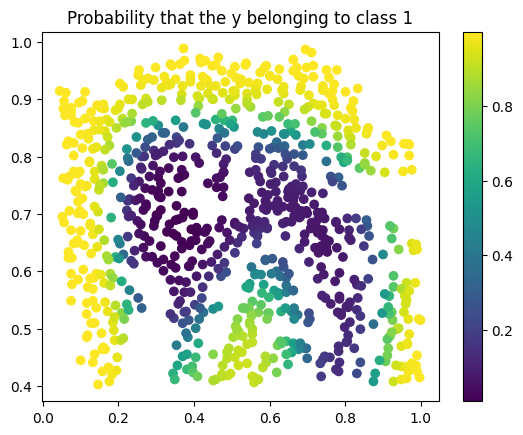

In [7]:
fig2, ax2 = plt.subplots()

s = ax2.scatter(X_train1['X1'], X_train1['X2'], c=prob1.T[1], cmap='viridis')
fig2.colorbar(s)
ax2.set_title("Probability that the y belonging to class 1")

* __(Optional) Try to tune the hyperparamters of SVM to get the accuracy larger than 90%__

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data[['X1', 'X2']], data['y'],
                                                    test_size=0.2, random_state=42)

In [9]:
hp = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'gamma': [0.1, 1, 10, 15, 20],
      'degree': [2, 3, 4],
      'class_weight': [None, 'balanced']}
accuracy = pd.DataFrame(columns=['accuracy'])
for k in hp['kernel']:
    if k == 'rbf':
        for g in hp['gamma']:
            for c in hp['class_weight']:
                model2 = SVC(kernel=k, gamma=g, class_weight=c)
                model2.fit(X_train2, y_train2)
                y_pred2 = model2.predict(X_test2)
                accuracy.loc[k+'_'+str(g)+'_'+str(c)] = accuracy_score(y_test2, y_pred2)
    elif k=='poly':
        for d in hp['degree']:
            for c in hp['class_weight']:
                model2 = SVC(kernel=k, degree=d, class_weight=c)
                model2.fit(X_train2, y_train2)
                y_pred2 = model2.predict(X_test2)
                accuracy.loc[k+'_'+str(d)+'_'+str(c)] = accuracy_score(y_test2, y_pred2)
    else:
        for c in hp['class_weight']:
            model2 = SVC(kernel=k, class_weight=c)
            model2.fit(X_train2, y_train2)
            y_pred2 = model2.predict(X_test2)
            accuracy.loc[k+'_'+str(c)] = accuracy_score(y_test2, y_pred2)
accuracy[accuracy['accuracy']>0.9]

,accuracy
rbf_15_None,0.913295
rbf_20_None,0.913295
rbf_20_balanced,0.919075


# Exercise 3

* __Dataset__

In [11]:
data3 = pd.read_csv("../data/heart.csv")
data3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* __Split the dataset into 2 parts (training and testing) with the ratio of 80 to 20__

In [12]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3.iloc[:, :-1], data3.iloc[:, -1],
                                                    test_size=0.2, random_state=42)

* __Try to use Logistic Regression, Naive Bayes and SVM to train the training dataset, then print classification report for each algorithm__

In [13]:
# Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train3, y_train3)
y_predict3_lr = lr.predict(X_test3)
cr_lr = classification_report(y_test3, y_predict3_lr)

In [14]:
# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train3, y_train3)
y_predict3_nb = nb.predict(X_test3)
cr_nb = classification_report(y_test3, y_predict3_nb)

In [15]:
# SVM model
svm = SVC()
svm.fit(X_train3, y_train3)
y_predict3_svm = svm.predict(X_test3)
cr_svm = classification_report(y_test3, y_predict3_svm)

In [16]:
from tabulate import tabulate

print(tabulate([['lr', cr_lr],
                ['nb', cr_nb],
                ['svm', cr_svm]], tablefmt='fancy_grid', stralign='right'))

╒═════╤═══════════════════════════════════════════════════════╕
│  lr │               precision    recall  f1-score   support │
│     │                                                       │
│     │            0       0.85      0.72      0.78       102 │
│     │            1       0.76      0.87      0.81       103 │
│     │                                                       │
│     │     accuracy                           0.80       205 │
│     │    macro avg       0.80      0.79      0.79       205 │
│     │ weighted avg       0.80      0.80      0.79       205 │
├─────┼───────────────────────────────────────────────────────┤
│  nb │               precision    recall  f1-score   support │
│     │                                                       │
│     │            0       0.87      0.71      0.78       102 │
│     │            1       0.75      0.89      0.82       103 │
│     │                                                       │
│     │     accuracy                    